### Tutorial 1: Estimation
#### Submitted by: Junaid Ramzan

#### 1. Replication of the results given in the lecture booklet.

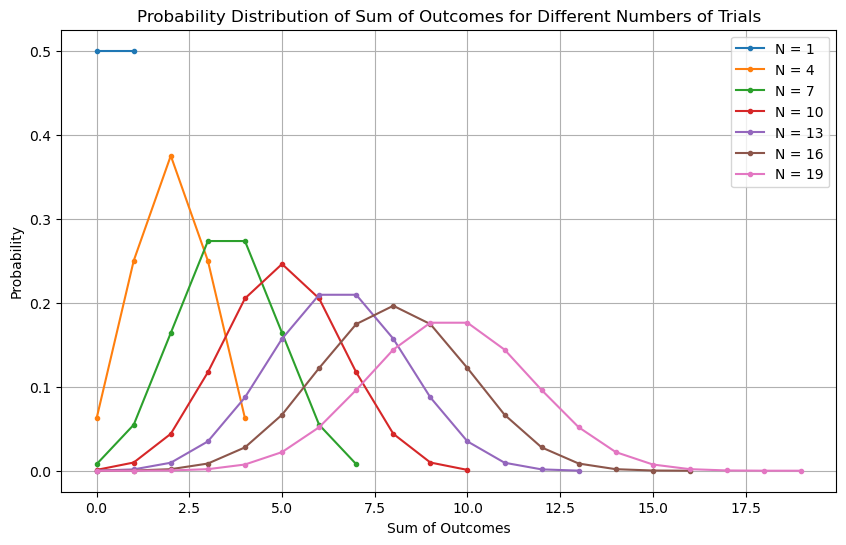

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Probability of success (outcomes '1' in this case)
p = 0.5
var = 0.25

# Trials
N_values = [1, 4, 7, 10, 13, 16, 19]

plt.figure(figsize=(10, 6))

for N in N_values:
    # Creating a binomial distribution
    binomial_dist = stats.binom(N, p)
    
    # Getting the x values for the distribution
    x = range(N + 1)
    
    # Pdf for each N
    pdf = binomial_dist.pmf(x)
    
    # Plotting the probability distribution for each N
    plt.plot(x, pdf, label=f'N = {N}', marker  = ".")

plt.xlabel('Sum of Outcomes')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sum of Outcomes for Different Numbers of Trials')
plt.legend()
plt.grid(True)
plt.show()


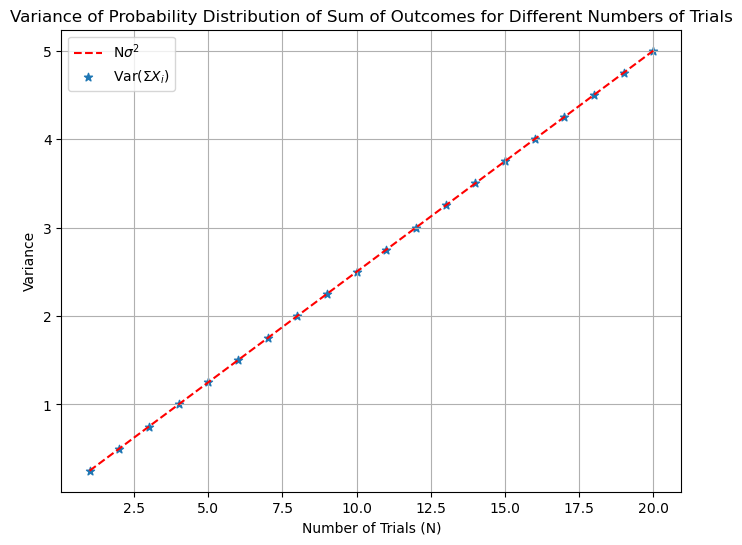

In [45]:
# Trials
N_values = np.arange(1, 21)

variance_formula = []
variance_summation = []

for N in N_values:
    # Creating a binomial distribution
    binomial_dist = stats.binom(N, p)
    
    # Getting the x values for the distribution
    x = np.arange(N + 1)
    
    # Pdf for each N
    pmf = binomial_dist.pmf(x)

    # Calculate variance using the formula
    var_formula = N * var
    variance_formula.append(var_formula)

    # Calculate variance by summation
    var_sum = np.sum((x - np.mean(x))**2 * pmf)
    variance_summation.append(var_sum)

plt.figure(figsize=(8, 6))

plt.plot(N_values, variance_formula, label='N$\sigma^2$',linestyle = '--', color ='red')
plt.scatter(N_values, variance_summation, label='Var$(\Sigma X_{i})$', marker='*')

plt.xlabel('Number of Trials (N)')
plt.ylabel('Variance')
plt.title('Variance of Probability Distribution of Sum of Outcomes for Different Numbers of Trials')
plt.legend()
plt.grid(True)
plt.show()


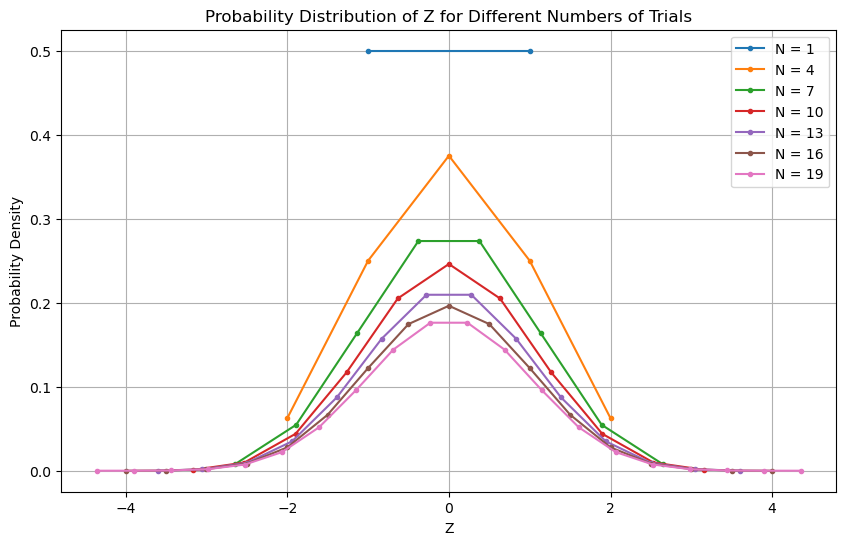

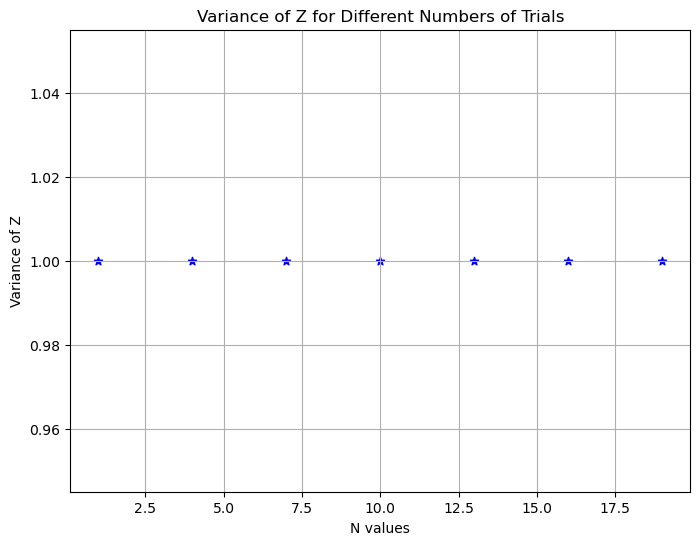

In [40]:
variances = []

plt.figure(figsize=(10, 6))

for N in N_values:
    # Creating a binomial distribution
    binomial_dist = stats.binom(N, p)
    x = np.arange(0, N + 1)
    # Pdf for each N
    pdf = binomial_dist.pmf(x)
    
    # Calculate Z for each x and plot Z against PDF
    Z_values = [(i - N * p) / np.sqrt(N * var) for i in x]
    
    # Calculate the variance of Z for the current N value
    Z_variance = np.sum([(Z_values[i] ** 2) * pdf[i] for i in range(len(x))]) - (np.sum([Z_values[i] * pdf[i] for i in range(len(x))])) ** 2
    variances.append(Z_variance)
    
    plt.plot(Z_values, pdf, label=f'N = {N}', marker  = ".")

plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Z for Different Numbers of Trials')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the variance of Z for different N values
plt.figure(figsize=(8, 6))
plt.scatter(N_values, variances, marker='*', color='blue')
plt.xlabel('N values')
plt.ylabel('Variance of Z')
plt.title('Variance of Z for Different Numbers of Trials')
plt.grid(True)
plt.show()


I missed first lectures as i was not in Besancon, So i tried my best to understand the theory and replicate the graphs but i think maybe my understanding the random variable is incomplete as i could not exactly replicate the 3rd graph but the graph is correct in a sense that the random variable has a mean 0 and variance 1 as N tends to large numbers.

#### 2: Write a Python program to compare the variation of biased and unbiased variance estimators as a function of the number of randomly drawn samples obeying a Gaussian distribution of known mean and variance of your choice.

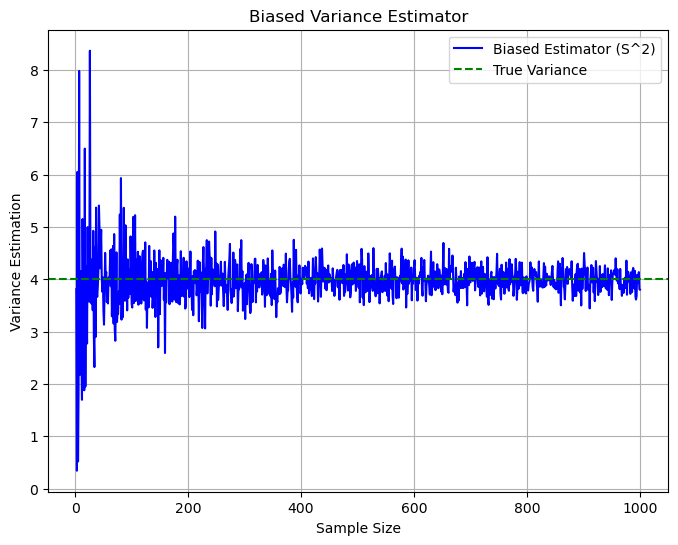

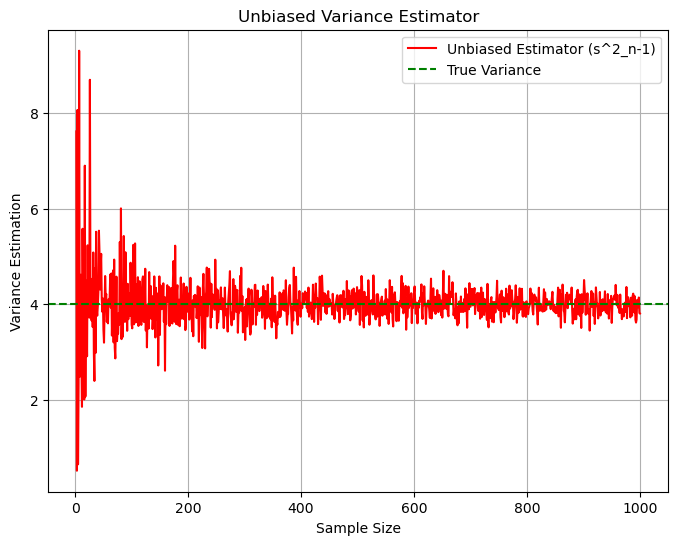

In [14]:

true_mean = 8  # True mean of the Gaussian distribution
true_variance = 4  # True variance of the Gaussian distribution
num_samples = 1000  # Number of samples
sample_sizes = np.arange(2, num_samples + 1)  # Varying sample sizes

biased_variances = []
unbiased_variances = []

# Generate random samples obeying a Gaussian distribution
for n in sample_sizes:
    samples = np.random.normal(true_mean, np.sqrt(true_variance), n)
    sample_mean = np.mean(samples)
    
    # Biased estimator (S^2)
    biased_variance = np.var(samples)
    biased_variances.append(biased_variance)
    
    # Unbiased estimator (s^2_n-1)
    unbiased_variance = np.var(samples, ddof=1)  # ddof=1 for unbiased variance
    unbiased_variances.append(unbiased_variance)

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, biased_variances, label='Biased Estimator (S^2)', color='blue')
plt.axhline(y=true_variance, color='green', linestyle='--', label='True Variance')
plt.xlabel('Sample Size')
plt.ylabel('Variance Estimation')
plt.title('Biased Variance Estimator')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, unbiased_variances, label='Unbiased Estimator (s^2_n-1)', color='red')
plt.axhline(y=true_variance, color='green', linestyle='--', label='True Variance')
plt.xlabel('Sample Size')
plt.ylabel('Variance Estimation')
plt.title('Unbiased Variance Estimator')
plt.legend()
plt.grid(True)
plt.show()